In [1]:
#matlab numpy conversion http://mathesaurus.sourceforge.net/matlab-numpy.html

In [1]:
%pylab inline
import scipy as sp

Populating the interactive namespace from numpy and matplotlib


In [2]:
def nrmse(output,target):
    combinedVar = 0.5 * (np.var(target, ddof=1) + np.var(output, ddof=1))
    errorSignal = output - target
#     print combinedVar
#     print errorSignal
#     print np.mean(errorSignal ** 2) / combinedVar
    return np.sqrt(np.mean(errorSignal ** 2) / combinedVar)

In [3]:
nrmse(np.array([[1,2,3],[3,4,5],[6,7,8]]), np.array([[1,2,3],[3,4,5],[6,7,9]]))

0.13592553320611694

In [4]:
nrmse(np.array([1,2,3]), np.array([1,2,4]))

0.44721359549995793

In [5]:
np.var(np.array([[1,2,3],[3,4,5],[6,7,8]]), ddof=1)

5.5

In [6]:
figsize(40,20)
for i in range(116):
    plot(cos(arange(1000) *((i+0.1) * 0.00005)), color="blue")

for i in range(112):
    plot(cos(arange(1000) *((i+0.1) * 0.0001)) * -1, color="magenta")

    
for i in range(10):
    plot(sin(arange(1000) *((i+0.1) * 0.0001)) * 0.5, color="black")
for i in range(10):
    plot(sin(arange(1000) *((i+0.1) * 0.0001)) * -0.5, color="cyan")

    
for i in range(10):
    plot(sin(arange(1000) *((i+0.1) * 0.0001)) * -0.5 + 0.5, color="green")

for i in range(30):
    plot(sin(arange(1000) *((i+0.1) * 0.0001)) * 1 - 0.5, color="white")

plt.savefig("/tmp/ati.pdf")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [7]:
import scipy.io as spio
matPath = "/Users/ck84/Documents/MATLAB/conceptorsMatlab4JMRL/canned3DimDemoNet.mat"
matData = spio.loadmat(matPath)
Wbias = matData['Wbias']
Win = matData['Win']
Wstar = matData['Wstar']
matData

{'Wbias': array([[-0.07111584],
        [-0.07624716],
        [-0.04747009]]), 'Win': array([[-1.03753005],
        [-1.83356646],
        [ 0.7684733 ]]), 'Wstar': <3x3 sparse matrix of type '<class 'numpy.float64'>'
 	with 7 stored elements in Compressed Sparse Column format>, '__globals__': [], '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI, Created on: Wed Aug 26 19:35:13 2015', '__version__': '1.0'}

In [8]:
N = 3 # network size
NetSR = 1.3 # spectral radius of initial reservoir weight matrix
NetinpScaling = 1.4 # scaling of input weights
BiasScaling = 0.1 # size of bias

# loading learning
TychonovAlpha = .0 # regularizer for  W training
washoutLength = 100
learnLength = 200
signalPlotLength = 15

# pattern readout learning
TychonovAlphaReadout = .0 # regularizer for  Wout training
learnLengthWout = 200

patterns = np.array([1,2])
# C learning and testing
alphas = np.array([12.0, 20.0]) # apertures of the conceptors
recallTestLength = 400

patt1 = lambda n: 1 * sin(2 * pi * n / 3.1504531)


period2 = 2
#rawp = np.random.randn(period2)
rawp = np.array([1.1929,2.6856]);
maxVal = np.max(rawp)
minVal = np.min(rawp)
print(rawp)
rp = 0.5 * (2 * (rawp - minVal) / (maxVal - minVal) - 1);
patt2 = lambda n: rp[mod(n, period2 )]


patts = [patt1, patt2]


[ 1.1929  2.6856]


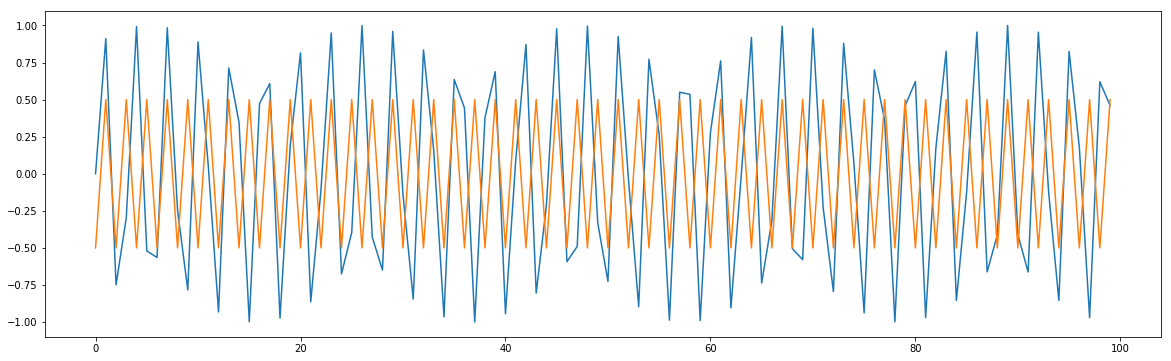

In [9]:
figsize(20,6)
plot([patt1(x) for x in arange(100)])
plot([patt2(x) for x in arange(100)])

In [10]:
I = np.eye(N)

In [11]:
xCollector = np.zeros((N, learnLengthWout))
pCollector = np.zeros((1, learnLengthWout))
x = np.zeros((N,1))

In [12]:
uCollector = np.array([[1.29659597737389,0.141303916287421,-1.27786383676316,1.31025667372516,-0.657058564632111,-0.644491577866947,-1.65409284035729,0.594370231691954,-1.44738765243394,0.252673144996911,-2.94803830227369,-1.11645313296545,-0.828460050726646,-1.22958907343692,1.66371270027821,-0.922418792669918,-0.381952941342196,-0.404744469659684,-2.50799109568475,-2.81406795737570,0.862509023817009,-1.29919972564652,-3.17478405156822,-1.44669850334056,0.319094161271421,0.716876116295719,0.150986601438780,0.446150047965298,0.855222738285989,-2.43674342919592,0.965164344921297,1.02279165225182,0.0219818194464094,-1.95231125335328,-1.92688041299253,1.21831983151087,1.25782217625674,2.13048149886050,-1.48462794590421,-1.77484391505039,-0.699388051550251,-0.548915184902409,1.67749923891707,-0.698422147469923,-2.34119927163148,-0.424654574451983,-1.98441213717244,-0.294357030994681,0.628558638314058,1.11347736354556,-0.214547852490995,-3.24291518227781,-0.966339282020903,2.15938449543829,-1.27037505555727,0.0860094898264256,0.965111728965013,-1.00564654655915,-0.00471273058085153,0.529397063787405,1.76925340191041,-1.02885311802960,2.51518414889320,-0.382963164443418,-0.971322738346639,-0.273321325798326,1.27770043839398,-0.459825056151516,-0.660793332666452,-0.917207815463683,-0.727810365190676,1.79552893358517,2.09218153549949,0.248051342212036,-0.764950434553090,2.06657497344963,1.94777633115633,-0.195175562996653,1.11037287937826,1.99802617018680,-0.417106033773994,-0.491989353378233,-0.0187908665114857,1.35476806380636,-1.66869499298394,-1.25881619481747,0.0533015880490293,-1.86979340515810,1.32675755600318,3.80750076632964,1.97519255829995,2.16331960770050,2.20037909907543,-1.66057771220337,-0.691404207451787,-0.0304438743583359,-0.0689972698044651,-0.816729864362526,1.37555184483400,-0.0291274615196470,1.16194525510188,-0.891079908717718,2.73041446595968,0.787077924092661,1.02890667056777,-1.35195633341189,3.20403452915894,0.480188912424077,-2.37617789686825,-0.753771357710414,1.10688950372333,-0.788087925986219,-2.29817231662009,-0.230679551860505,-0.970098085156891,-2.01217481664980,0.407301204345512,0.509311700579061,2.51186999065283,0.503453467141724,-0.825834083257857,-0.429760229361089,-1.22218675201217,0.0802618098862812,-0.641762033580902,0.695789696193203,0.624882717497718,0.287450686579645,-1.92649209246137,-1.51006298915574,0.0626788236735135,-1.13591402737486,3.41830723865236,-2.70062130652968,0.264447831997040,-0.395691628910999,-1.25083233431699,0.331150309989739,-1.32334439263346,1.28476450233322,-1.38853435235491,-1.37110553376583,-1.99144275977975,2.41759108343736,-0.842740900327687,0.414061736374855,-0.341479121997979,0.276275003019571,0.124244360569257,0.678052889689479,0.152116244925714,-0.548640602726320,-0.136551913759457,1.10918543547249,1.41049268785313,-0.0434411480368311,-1.39306567054280,1.11755761272891,3.73214711443284,1.03788730349013,-1.41256534903860,0.577495834818009,-0.418330480466928,-1.47441552637040,2.43112693996196,-4.57773772345259,-0.0726802848026489,0.477303448145969,-0.953271129516426,-1.54310338577551,2.46207045813662,0.0292426029400143,-3.07090282541822,-1.69395676957186,-3.53337892543680,-0.841873128151421,-0.131958756761000,1.61066583530744,-0.467863625721794,-2.21816065589803,-0.0659680846672439,-1.19980259725107,-1.29773688052015,-0.178510476403315,-0.322244293389356,0.0109721790123403,-1.55920841833889,1.24925365689036,-1.12004284869017,0.523913278420964,0.726019785613237,-1.51178851833653,1.50520381095478,-4.01413337157644,0.0252335889958285,-2.16486817046589,0.159752887948329,-0.785207167560370,1.45287174760406,-1.01364232012969,-1.62976739905193,1.18937602044671,2.41194975267404,-2.07929987734770,1.28798367978922,0.311361805362022,1.57329695197535,-1.17610663237769,-0.489219650171027,-0.623047975550462,-0.511177869602568,0.847524356502375,0.662743606676962,-0.163811022731173,0.645823070294311,1.03956083023042,-0.821383853368082,1.41710435903369,-1.18883488742200,0.420251711161733,-2.46446167938536,0.472118544246595,1.54542885639630,2.62755198837037,-0.377412446222973,2.72882032514253,1.85159885657312,-3.50941749092042,-0.0579372071579117,0.0109395925778401,-0.847543076021138,1.66238601479785,0.780711175589155,-0.746506560470571,-0.266846400418291,1.63652452833022,1.73959701319263,1.01250645369782,3.43763351088743,-2.09826797778608,-2.29922975965264,0.604517579676359,-0.699763299705030,0.642407782006469,-2.08577200175755,-0.920798788354525,-1.49329591718160,-1.65907054064927,0.517733693606291,2.45760859634596,-0.826368647775104,2.49690986861763,-0.0720560753039268,0.993011950857332,-0.445482555505238,2.49103371242572,0.0856971905875195,-3.34112642733652,1.86779885962999,-1.73794142314722,1.30109548062033,-1.20197318817726,-0.395414812131563,1.12658753102549,2.69284220097598,1.47652646104762,0.0700032978999467,0.485164999558096,0.783663328179626,-1.18279089026162,1.10110580974052,0.120623622860536,-0.815982086446330,0.474385854899072,-2.11306469479370,0.280220653291671,-3.39365024532989,0.750562975979218,-0.337239137109235,-2.18321140404337,-0.0232550377739467,-0.656693719126724,1.36072439628612,1.92620016108164,-1.09513649786071,-2.20900275086641,-2.39153108150230,0.746379514212337,1.11157429588381,-0.532558622437546,-1.21586151899346,0.357318084798874,2.25760982029089,-1.78434140878087,-0.292234957485264,0.937180156970930,-1.91710037813884,0.150389030803262,-0.513272514278480,-0.00302204939557977]])

In [13]:
for n in arange(washoutLength + learnLength):
    #u = np.random.randn() * 1.5
    u = uCollector[0, n]
    
    x = np.tanh(Wstar * x + Win * u + Wbias)
    if n >= washoutLength:
        xCollector[:, n - washoutLength] = x[:,0]
        pCollector[0, n - washoutLength] = u
    

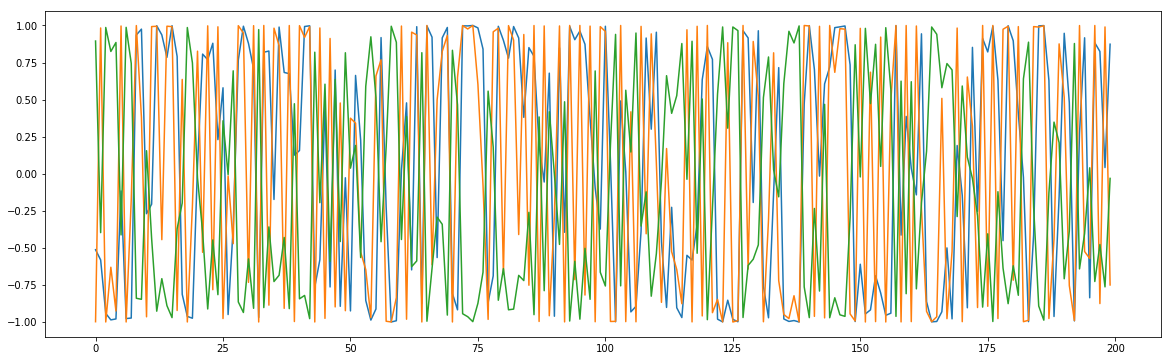

In [14]:
plot(xCollector.T)


In [15]:
Wout = linalg.inv(xCollector.dot(xCollector.conj().T) +  
                  (TychonovAlphaReadout * np.eye(N))).dot(xCollector).dot(pCollector.conj().transpose()).conj().T

In [20]:
print ("NMRSE: ",nrmse(Wout.dot(xCollector), pCollector))
print ("absWeight: " , mean(abs(Wout)))

NMRSE:  0.382680505835
absWeight:  0.680179469232


In [21]:
Wout

array([[-0.77899219, -1.0771488 ,  0.18439742]])

In [24]:
#need to check this code...

print (patterns.size)
print (learnLength)
print (N)

allTrainArgs = np.zeros((N, patterns.size * learnLength))
allTrainOldArgs = np.zeros((N, patterns.size * learnLength))
allTrainTargs = np.zeros((N, patterns.size * learnLength))
allTrainOuts = np.zeros((1, patterns.size * learnLength))
xCollectors =  np.zeros((1,patterns.size), dtype=np.object)
SRCollectors =  np.zeros((1,patterns.size), dtype=np.object)
URCollectors =  np.zeros((1,patterns.size), dtype=np.object)
patternRs =  np.zeros((1,patterns.size), dtype=np.object)
train_xPL =  np.zeros((1,patterns.size), dtype=np.object)
train_pPL =  np.zeros((1,patterns.size), dtype=np.object)
startXs =  np.zeros((N,patterns.size), dtype=np.object)

for p in range(patterns.size):
    print(p)
    patt = patts[p]
    xCollector = zeros((N, learnLength))
    xOldCollector = zeros((N, learnLength))
    pCollector = zeros((1, learnLength))
    x = zeros((N,1))
    for n in range(washoutLength + learnLength):
        u = patt(n+1)
        xOld = x
        x = tanh((Wstar * x) + (Win * u) + Wbias)
        if n >= washoutLength:
            xCollector[:, n - washoutLength] = x[:,0]
            xOldCollector[:, n - washoutLength] = xOld[:,0]
            pCollector[0, n - washoutLength] = u
    
    xCollectors[0,p] = xCollector
    R = xCollector.dot(xCollector.T) / learnLength
    [Ux,sx,Vx] = svd(R)
    SRCollectors[0,p] = diag(sx)
    URCollectors[0,p] = Ux
    patternRs[0,p] = R
    
    startXs[:,p] = x[:,0]
    train_xPL[0,p] = xCollector[:,:signalPlotLength]
    train_pPL[0,p] = pCollector[0,:signalPlotLength]
    
    allTrainArgs[:, p * learnLength:(p+1) * learnLength] = xCollector
    allTrainOldArgs[:, p * learnLength:(p+1) * learnLength] = xOldCollector
    allTrainOuts[0, p * learnLength:(p+1) * learnLength] = pCollector
    allTrainTargs[:, p * learnLength:(p+1) * learnLength] = Win.dot(pCollector)
            
            
    

2
200
3
0
1


In [26]:
Wtargets = np.arctanh(allTrainArgs) - np.tile( Wbias, (1, patterns.size * learnLength))

W = linalg.inv(allTrainOldArgs.dot(allTrainOldArgs.conj().T) +
                  (TychonovAlpha * np.eye(N))).dot(allTrainOldArgs).dot(Wtargets.conj().T).conj().T
print ("W NMRSE: ", mean(nrmse(W.dot(allTrainOldArgs), Wtargets)))
print ("absSize: ", mean(mean(abs(W), axis=0)))

W NMRSE:  0.0980418332388
absSize:  0.780112833609


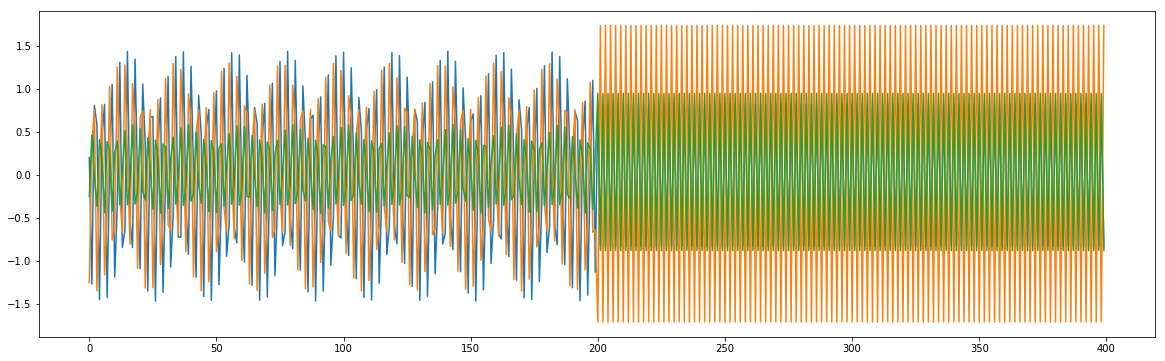

In [27]:
plot(W.dot(allTrainOldArgs).T)

In [28]:
pow(alphas,-2)

array([ 0.00694444,  0.0025    ])

In [29]:
Cs = np.zeros((4, patterns.size), dtype=np.object)
for p in range(patterns.size):
    R = patternRs[0,p]
    [U,s,V] = svd(R)
    S = diag(s)
    Snew = (S * linalg.inv(S + pow(alphas[p], -2) * np.eye(N)))
    
    C =  U.dot(Snew).dot(U.T);
    Cs[0,p] = C
    Cs[1,p] = U
    Cs[2,p] = diag(Snew)
    Cs[3,p] = diag(S)

x_CTestPL = np.zeros((3, recallTestLength, patterns.size))
p_CTestPL = np.zeros((1, recallTestLength, patterns.size))
for p in range(patterns.size):
    C = Cs[0,p]
    x = 0.5 * np.random.randn(N,1)
    for n in range(recallTestLength + washoutLength):
        x = np.tanh(W.dot(x) + Wbias)
        x = C.dot(x)
        if (n > washoutLength):
            x_CTestPL[:,n-washoutLength,p] = x[0:3].T
            p_CTestPL[:,n-washoutLength,p] = Wout.dot(x)
    

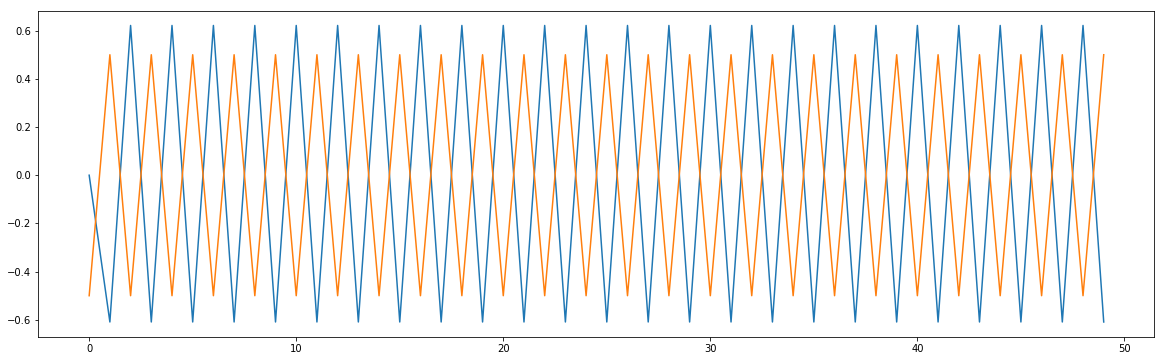

In [32]:
plot(p_CTestPL[:,:,1].T[:50])
plot([patt2(x) for x in arange(50)])

In [596]:
x

array([[ 0.72833443],
       [ 0.48233426],
       [-0.16041596]])

In [591]:
np.tile( Wbias, (1, patterns.size * learnLength))

array([[-0.07111584, -0.07111584, -0.07111584, ..., -0.07111584,
        -0.07111584, -0.07111584],
       [-0.07624716, -0.07624716, -0.07624716, ..., -0.07624716,
        -0.07624716, -0.07624716],
       [-0.04747009, -0.04747009, -0.04747009, ..., -0.04747009,
        -0.04747009, -0.04747009]])

In [115]:
a = zeros((3,5), dtype=np.object)
a[:,3]

array([0, 0, 0], dtype=object)

In [256]:
mean(mean(abs(W), axis=0))

0.91263297384710285

In [79]:
q = np.random.random((3,5))
q

array([[ 0.78661245,  0.75431312,  0.34531025,  0.15043398,  0.26133151],
       [ 0.29985101,  0.3920275 ,  0.69895481,  0.95360171,  0.97147249],
       [ 0.49583182,  0.93842706,  0.03747569,  0.92928044,  0.21329869]])

In [95]:
a[:,0]

array([3, 6, 9])

In [96]:
q[:, 0] = a[:,0]

In [97]:
q

array([[ 3.        ,  0.75431312,  0.34531025,  0.15043398,  0.26133151],
       [ 6.        ,  0.3920275 ,  0.69895481,  0.95360171,  0.97147249],
       [ 9.        ,  0.93842706,  0.03747569,  0.92928044,  0.21329869]])

In [153]:
[U,s,V] = np.linalg.svd(np.ones((3,3)))
print U
print diag(s)
print V.T

[[ -5.77350269e-01   8.16496581e-01  -1.57496771e-16]
 [ -5.77350269e-01  -4.08248290e-01  -7.07106781e-01]
 [ -5.77350269e-01  -4.08248290e-01   7.07106781e-01]]
[[  3.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.55806258e-17   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   2.11125548e-48]]
[[-0.57735027  0.81649658  0.        ]
 [-0.57735027 -0.40824829 -0.70710678]
 [-0.57735027 -0.40824829  0.70710678]]


In [103]:
patterns

array([1, 2])